# ECG Analysis project

## Jorge Veiras Yanes

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Introduction

In this day and age, one of the main causes of death are cardiovascular diseases. According to the WHO (World Health Organization), cardiovascular diseases take **17.9 million** lives each year; representing approximately, **30%** of all global deaths.

The proliferation of these diseases is a direct consequence of bad habits for a long period of time, such as the lack of physical activity, following an unbalanced diet, abuse of toxic substances like alcohol or tobacco ...
All these previous behaviors are deeply rooted in our society, and although awareness campaigns have managed to reduce the number of deaths annually, this number is still worryingly high.

Taking into account that an average adult's heart beats about 100,000 times a day, and about **35 million** times a year, during an average lifetime, the heart would have beaten more than **2.5 billion** times. Thus, it is not viable that a cardiologist analyses manually the huge amount of data generated for diagnosing arrhythmias.

Hence, the aim of this project is to propose a series of algorithms able to automatically detect and classify arrhythmias without the presence of a doctor.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Index

1. [Theorethical framework](#Theoretical-framework-(ECG-recordings))<br>
2. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
    2.1 [First Dataset](#First-dataset)<br>
    2.2 [Second Dataset](#Second-dataset)<br>
3. [Preparing the data](#Preparing-the-data)<br>
4. [First dataset Machine Learning analysis](#First-dataset-Machine-Learning-analysis:)<br>
5. [Second dataset Machine Learning analysis](#MIT-BIH-Supraventricular-Arrhythmia-Database)<br>
6. [Conclusion](#Conclusion)<br>

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Theorethical framework (ECG recordings)

The typical ECG for a normal heartbeat consists of a P wave, a complex QRS, and a T wave:

- The P wave corresponds to the depolarization of the atrium, being the first positive deflection shown in the figure 1.


- We can divide the complex QRS in 3 parts:

    - The Q wave is the depolarization of the interventricular septum, and corresponds to the first negative deflection following the P wave.
        
    - The R wave is the depolarization of the left ventricle, known as the first positive deflection following the P wave .
        
    - The S wave is the depolarization of the right ventricle, which is defined as the second negative deflection following the P wave.
      
      
- The T wave is the ventricular repolarization, thanks to it, a new depolarization can be produced.                                    

![ECG_parts.png](ECG_parts.png)

                                   Figure 1: Heartbeat in ECG with waves and intervals labelled.

There are many types of arrhythmias. Some of them, such as fibrillations, are especially serious and require immediate medical assistance.

Others, do not require an instant medical intervention, however, they must be treated in order to avoid the development of more dangerous heart diseases.

We are going to focus on this last type of arrhythmias. According to the Advancement of Medical Instrumentation (AAMI), we can classify these benign arrhythmias into three groups:

- **Supraventricular (S-class)**: heartbeats that have a supraventricular origin, and that differ from normal beats in the time they appear (they may cause the heart to beat too fast, too slow, or irregularly). It results in an upside-down P wave.


- **Ventricular (V-class)**: heartbeats that have a ventricular origin, which present morphological and rhythmic differences concerning normal beats. These ones can limit or stop your heart from supplying blood to your body. In the ECG it is shown as a  tall and wide QRS complex.


- **Fusion (F-class)**: heartbeats produced by the combination of ventricular and normal beats. The P wave is modified by an additional source of depolarization.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Exploratory Data Analysis

In order to build our classification model, we are going to use two ECG recordings datasets extracted from [physionet](https://physionet.org/):

- [MIT-BIH Arrhythmia Database](https://physionet.org/content/mitdb/1.0.0/): This dataset contains 48 ECG recordings, 30 minutes long each one, for two different derivations sampled at 360 Hz.

- [MIT-BIH Supraventricular Arrhythmia Database](https://physionet.org/content/svdb/1.0.0/): This dataset includes 78 ECG recordings, 30 minutes long each one, sampled at 128 Hz.

First of all, we will see the distribution of heart beat types across all files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import wfdb

We make a list of the patients of each database for labelling purpose:

In [2]:
patientsA=['100', '101', '102', '103', '104', '105', '106', '107', '108',
           '109', '111', '112', '113', '114', '115', '116', '117', '118',
            '119', '121', '122', '123', '124', '200', '201', '202', '203',
           '205', '207', '208', '209', '210', '212', '213', '214', '215', 
           '217', '219', '220', '221', '222','223', '228', '230', '231',
           '232', '233', '234'] 

patientsB =['800', '801', '802', '803', '804', '805', '806', '807', '808',
           '809', '810', '811', '812', '820', '821', '822', '823', '824',
           '825', '826', '827', '828', '829', '840', '841', '842', '843',
           '844', '845', '846', '847', '848', '849', '850', '851', '852',
           '853', '854', '855', '856', '857', '858', '859', '860', '861',
           '862', '863', '864', '865', '866', '867', '868', '869', '870',
           '871', '872', '873', '874', '875', '876', '877', '878', '879',
           '880', '881', '882', '883', '884', '885', '886', '887', '888',
           '889', '890', '891', '892', '893', '894']


len(patientsA)


48

We build a function to dip into the different types of heartbeats: 

In [3]:
data_pathA='mit-bih-arrhythmia-database-1.0.0/'
data_pathB='mit-bih-supraventricular-arrhythmia-database-1.0.0/'

In [4]:
df_A = pd.DataFrame()
df_B = pd.DataFrame()

In [5]:
def HeartBeats(data_path, df, patients):
    
    for i in patients:
        
        file = data_path + i
        annotation=wfdb.rdann(file, 'atr')   #wfdb.rdann reads a WFDB annotation file
        sym=annotation.symbol                #The symbols used to display the annotation labels

        values, counts = np.unique(sym, return_counts=True) #Find the unique elements of the array and count them
        
        df_sub=pd.DataFrame({'sym':values, 'val':counts, 'i':[i]*len(counts)})  #We create Pandas table
        df=pd.concat([df, df_sub], axis=0)
        
    return(df.groupby('sym').val.sum().sort_values(ascending=False))  #We print all the types of heartbeats

HeartBeats of *Arrhythmia Database*:

In [6]:
HeartBeats(data_pathA, df_A, patientsA)

sym
N    75052
L     8075
R     7259
V     7130
/     7028
A     2546
+     1291
f      982
F      803
~      616
!      472
"      437
j      229
x      193
a      150
|      132
E      106
J       83
Q       33
e       16
[        6
]        6
S        2
Name: val, dtype: int64

HeartBeats of *Supraventricular Arrhythmia Database*:

In [7]:
HeartBeats(data_pathB, df_B, patientsB)

sym
N    162339
S     12188
V      9943
|      2211
~      1082
Q        79
F        23
J         9
a         1
B         1
+         1
Name: val, dtype: int64

By reading the [beats annotations](https://archive.physionet.org/physiobank/annotations.shtml) meanings, provided by physionet, we can rapidly classify the real beats annotations and the insignificant symbols for our analysis. Another point worth noting is that in the first data set, we only have 2 supraventricular arrhythmias, so, if we only took this dataset, our classifier may not be accurate at the time of detecting a supraventricular arrhythmia. Hence, after making a quick exploration of both datasets, it would be a nice idea to concatenate them.

Now, we will observe the proportion of each type of beat to see how representative our datasets are:

In [8]:
#Types (Read beats annotations)

non_beats = ['[','!',']','x','(',')','p','t','u','`', '\'','^','|','~','+','s','T','*','D','=','"','@','Q','?']

abnormal_beats = ['L','R','V','/','A','f','F','j','a','E','J','e','S']

normal_beats = ['N']
           

In [9]:
# We break our datasets

def breaking_datasets(data_path, df, patients, non_beats, abnormal_beats, normal_beats):
    
    for i in patients:        
        file = data_path + i
        annotation=wfdb.rdann(file, 'atr')
        sym=annotation.symbol    #This is the code of the HeartBeats function(Ask how can I optimise, refering to definition of variables)
        values, counts = np.unique(sym, return_counts=True)                                                                                  
        df_sub=pd.DataFrame({'sym':values, 'val':counts, 'i':[i]*len(counts)})  
        df=pd.concat([df, df_sub], axis=0)
        
    df['Classification'] = 'Non Beats'   
    df.loc[df.sym == 'N','Classification'] = 'Normal Beats'  
    df.loc[df.sym.isin(abnormal_beats), 'Classification'] = 'Abnormal beats'  
    
    return(df.groupby('Classification').val.sum().sort_values(ascending=False))

In [10]:
breaking_datasets(data_pathA, df_A, patientsA, non_beats, abnormal_beats, normal_beats)

Classification
Normal Beats      75052
Abnormal beats    34409
Non Beats          3186
Name: val, dtype: int64

In [11]:
breaking_datasets(data_pathB, df_B, patientsB, non_beats, abnormal_beats, normal_beats)

Classification
Normal Beats      162339
Abnormal beats     22164
Non Beats           3374
Name: val, dtype: int64

We can clearly see that the second dataset is more unbalanced than the first one. However, this is not to say does that the second one is worse.

In the second dataset the abnormal beats represent the **12%** of the total heart beats, while in the first one, they represent the **30.5%** of the whole. If we check the literature, between 1.5 and 5 percent of the world population experience arrhytimia. Thus, supposing we implement a device that detects the arrhytimias for whole population, we will have a much less proportion of abnormal beats than we have in our datasets.

We will take this into account at the time of discussing our final results.

Let's plot the ECG signal for one patient on each dataset:

In [12]:
#Function for loading one particular file in dataset

def load_file(file):
    
    record = wfdb.rdrecord(file) #load de ecg
    
    annotation = wfdb.rdann(file, 'atr') #read the annotation
    
    p_signal = record.p_signal #extracting the signal
    
    atr_sym = annotation.symbol  #extract symbols and annotations
    atr_sample = annotation.sample
    
    return p_signal, atr_sym, atr_sample
    

Let's search explicitly for abnormal beats to plot them in the graph. 

### First dataset

In [13]:
file = data_pathA + patientsA[0]   #First patient

In [14]:
p_signal, atr_sym, atr_sample = load_file(file) #

In [15]:
 for i in patientsA:        
        file = data_pathA + i
        annotation=wfdb.rdann(file, 'atr')
        sym=annotation.symbol    #This is the code of the HeartBeats function(Ask how can I optimise, refering to definition of variables)
        values, counts = np.unique(sym, return_counts=True) 
        

for v,c in zip(values, counts):
    print(v,c)   #Beats in patient 1

+ 3
J 50
N 2700
V 3
~ 8


Let's find the position of some of the abnormal beats:

In [16]:
ab_index = [b for a, b in zip(atr_sym,atr_sample) if a in abnormal_beats][:10]  #Loops over all the file and takes abnormal beats
ab_index

[2044, 66792, 74986, 99579, 128085, 170719, 279576, 305709, 307745, 312825]

In [17]:
x = np.arange(len(p_signal))  #array of all recording

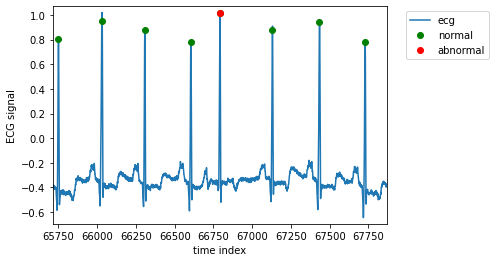

In [18]:
left = ab_index[1]-1080 #We pick second abnormal beat and define the limits of plot
right = ab_index[1]+1080

#Plot
plt.plot(x[left:right],p_signal[left:right,0],'-',label='ecg',)
plt.plot(x[atr_sample],p_signal[atr_sample,0],'go',label ='normal')
plt.plot(x[ab_index],p_signal[ab_index,0],'ro',label='abnormal')

plt.xlim(left,right)
plt.ylim(p_signal[left:right].min()-0.05,p_signal[left:right,0].max()+0.05)
plt.xlabel('time index')
plt.ylabel('ECG signal')
plt.legend(bbox_to_anchor = (1.04,1), loc = 'upper left')
plt.show()

### Second dataset

We repeat the same process changing a bit some parameters due to the fact that frequency sampling is different.

In [19]:
file = data_pathB + patientsB[0]   #First patient

In [20]:
p_signal, atr_sym, atr_sample = load_file(file)

In [21]:
 for i in patientsB:        
        file = data_pathB + i
        annotation=wfdb.rdann(file, 'atr')
        sym=annotation.symbol    #This is the code of the HeartBeats function(Ask how can I optimise, refering to definition of variables)
        values, counts = np.unique(sym, return_counts=True) 
        

for v,c in zip(values, counts):
    print(v,c)   #Beats in patient 1

N 2213
Q 1
S 80
V 53
| 21
~ 66


In [22]:
ab_index = [b for a,b in zip(atr_sym,atr_sample) if a in abnormal_beats][:10]
ab_index

[6474, 27407, 28366, 34961, 61322, 68270, 72059, 73849, 74416, 74702]

In [23]:
x = np.arange(len(p_signal))

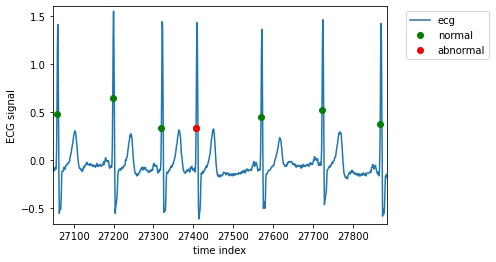

In [24]:
left = ab_index[1]-360
right = ab_index[1]+480

plt.plot(x[left:right],p_signal[left:right,0],'-',label='ecg',)
plt.plot(x[atr_sample],p_signal[atr_sample,0],'go',label ='normal')
plt.plot(x[ab_index],p_signal[ab_index,0],'ro',label='abnormal')

plt.xlim(left,right)
plt.ylim(p_signal[left:right].min()-0.05,p_signal[left:right,0].max()+0.05)
plt.xlabel('time index')
plt.ylabel('ECG signal')
plt.legend(bbox_to_anchor = (1.04,1), loc = 'upper left')
plt.show()

We can see in both graphs the ECG recordings of each patient, as well as the abnormal beats marked with red dots.

# Preparing the data

We are going to work with both datasets separatedly since they have different frequency sampling. First, a classifier for the first dataset will be made, and afterwards, it will be discussed if a wider dataset with more arrhythmias samples would help our classificator, and if so, we will analyse the changes in results by using the second dataset with more arrhytmia samples

Hence, the aim of this part of the project is to discuss if our first dataset is representative enough for making a decent classifier which classifies arrhythmias and normal segments.

In this study, we are not going to classify individual heartbeats, instead, we will work with segments of the ECG recordings. In this way, our model will group certain number of heartbeats on each segment, and after, each of these segments will be classified.



Each of these segments will be labelled using binary notation in the following way:


    - Labelled as 0 if it is a "normal" segment
    - Labelled as 1 if it consists of an arrhythmia segment
    
For the first dataset, we will divide the records into segments of 6 seconds each one with the beats centered in 0. The dataset idea was taking from [TowardsDataScienceProject](https://towardsdatascience.com/detecting-heart-arrhythmias-with-deep-learning-in-keras-with-dense-cnn-and-lstm-add337d9e41f) (a function that creates a dataset ignoring non-beats). 



In [25]:
def make_dataset(data_path, patients, num_sec, frequency,  abnormal_beats): 
    
    #The output is:
    #   X_all = signal (nbeats , num_sec * frequency columns)
    #   Y_all = binary is abnormal (nbeats, 1)
    #   sym_all = beat annotation symbol (nbeats,1)
    
    # initialize numpy arrays
    num_cols = 2*num_sec * frequency   #num_sec = Number of seconds to include before and after the beat
    X_all = np.zeros((1,num_cols))
    Y_all = np.zeros((1,1))
    sym_all = []
    
    # list to keep track of number of beats across patients
    max_rows = []
    
    for pt in patients:
        file = data_path + pt
        
        p_signal, atr_sym, atr_sample = load_file(file)
        
        # grab the first signal
        p_signal = p_signal[:,0]
        
        # make df to exclude the nonbeats
        df_ann = pd.DataFrame({'atr_sym':atr_sym,
                              'atr_sample':atr_sample})
        df_ann = df_ann.loc[df_ann.atr_sym.isin(abnormal_beats + ['N'])]
        
        X,Y,sym = build_XY(p_signal,df_ann, num_cols, abnormal_beats)
        sym_all = sym_all+sym
        max_rows.append(X.shape[0])
        X_all = np.append(X_all,X,axis = 0)
        Y_all = np.append(Y_all,Y,axis = 0)
    # drop the first zero row
    X_all = X_all[1:,:]    
    Y_all = Y_all[1:,:]
    
    # check sizes make sense
    assert np.sum(max_rows) == X_all.shape[0], 'number of X, max_rows rows messed up'
    assert Y_all.shape[0] == X_all.shape[0], 'number of X, Y rows messed up'
    assert Y_all.shape[0] == len(sym_all), 'number of Y, sym rows messed up'
    return X_all, Y_all, sym_all
def build_XY(p_signal, df_ann, num_cols, abnormal_beats):
    # this function builds the X,Y matrices for each beat
    # it also returns the original symbols for Y
    
    num_rows = len(df_ann)
    X = np.zeros((num_rows, num_cols))
    Y = np.zeros((num_rows,1))
    sym = []
    
    # keep track of rows
    max_row = 0
    for atr_sample, atr_sym in zip(df_ann.atr_sample.values,df_ann.atr_sym.values):
        left = max([0,(atr_sample - num_sec*frequency) ])
        right = min([len(p_signal),(atr_sample + num_sec*frequency) ])
        x = p_signal[left: right]
        if len(x) == num_cols:
            X[max_row,:] = x
            Y[max_row,:] = int(atr_sym in abnormal_beats)
            sym.append(atr_sym)
            max_row += 1
    X = X[:max_row,:]
    Y = Y[:max_row,:]
    return X,Y,sym

We run the function:

In [26]:
num_sec=3
frequency=360
X_A, Y_A, sym_A = make_dataset(data_pathA, patientsA, num_sec, frequency, abnormal_beats)
num_sec=2
frequency=170
X_B, Y_B, sym_B = make_dataset(data_pathB, patientsB, num_sec, frequency, abnormal_beats)

In [27]:
X_A

array([[-0.34 , -0.335, -0.33 , ..., -0.36 , -0.35 , -0.34 ],
       [-0.39 , -0.395, -0.41 , ..., -0.34 , -0.335, -0.33 ],
       [-0.4  , -0.41 , -0.425, ..., -0.33 , -0.33 , -0.34 ],
       ...,
       [-0.255, -0.26 , -0.26 , ..., -0.225, -0.22 , -0.22 ],
       [-0.28 , -0.265, -0.26 , ..., -0.19 , -0.195, -0.185],
       [-0.23 , -0.215, -0.2  , ..., -0.27 , -0.27 , -0.275]])

In [28]:
len(X_A)

109099

In [29]:
len(X_A[0,:])

2160

In [30]:
len(Y_A)

109099

In [31]:
X_B

array([[-0.105, -0.085, -0.135, ..., -0.025,  0.135,  0.485],
       [-0.045, -0.045, -0.075, ...,  1.18 ,  1.505,  1.255],
       [ 0.035,  0.335,  0.97 , ...,  1.395,  1.115,  0.475],
       ...,
       [-0.07 , -0.04 , -0.04 , ..., -0.15 , -0.3  , -0.14 ],
       [-0.39 , -0.38 , -0.39 , ..., -0.08 , -0.1  , -0.06 ],
       [-0.5  , -0.51 , -0.53 , ..., -0.43 , -0.47 , -0.49 ]])

In [32]:
len(X_B)

183978

In [33]:
len(Y_B)

183978

# First dataset Machine Learning analysis:

For this analysis, we will work with traditional machine learning methods such as (logistic regression, decisition trees, random forests) and then, also with deep learning methods. Next scheme will be followed:

- Normalization
- PCA
- Split datasets
- Methods application

## Normalization

It makes the neural network trainning process easier as we obtain zero mean and unit variance. L1 normalization is chosen due to the fact that it is more robust than L2 normalization (it is able to ignore better extreme values), and because it favors sparsity. 

L1 normalization consists on dividing each component ($x_i$) of the vector ($x$) by the sum of the absolute values of each component:

\begin{equation}
||x||_{L_1}=\sum_{i}^{n}|x_i|
\end{equation}


In [34]:
from sklearn.preprocessing import normalize

X_normalized_A = normalize(X_A, norm='l1')

In [35]:
X_normalized_A

array([[-0.00044296, -0.00043645, -0.00042993, ..., -0.00046902,
        -0.00045599, -0.00044296],
       [-0.00049802, -0.00050441, -0.00052356, ..., -0.00043417,
        -0.00042779, -0.0004214 ],
       [-0.00051139, -0.00052418, -0.00054336, ..., -0.0004219 ,
        -0.0004219 , -0.00043469],
       ...,
       [-0.00038614, -0.00039371, -0.00039371, ..., -0.00034071,
        -0.00033314, -0.00033314],
       [-0.00042733, -0.00040444, -0.0003968 , ..., -0.00028997,
        -0.0002976 , -0.00028234],
       [-0.0003534 , -0.00033036, -0.00030731, ..., -0.00041486,
        -0.00041486, -0.00042255]])

In [36]:
Y_A.shape

(109099, 1)

In [37]:
X_normalized_A.shape

(109099, 2160)

## PCA

PCA is a statistical method that allows us to simplify the complexity of sample spaces with many dimensions, while preserving their information. Our data is very high-dimensional, so, we should consider using a dimensionality reduction technique.

In [38]:
from sklearn import decomposition

pca=decomposition.PCA()
pca.fit(X_normalized_A)

PCA()

Number of parameter reduction is very important for classification or detection of unique cases. Thus, we are going to use a `Scree plot`.

The scree plot is used to determine the number of factors to retain in a principal component analysis (PCA).

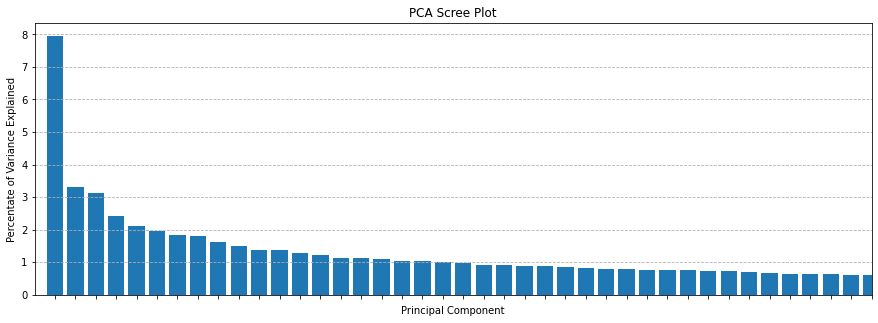

In [39]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ["PC%d"%(i+1) for i in range(0,X_normalized_A.shape[1])] 

plt.figure(figsize=(15, 5))
plt.bar(x= range(0,X_normalized_A.shape[1]), height=percent_variance, tick_label="")
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(-1,40)
plt.title('PCA Scree Plot')
plt.grid(linestyle="--",axis="y");

In [40]:
print('We have in total %i components' %(X_normalized_A.shape[1]))

We have in total 2160 components


There are many procedures to select the number of appropiate factors to discard. For this, the cumulative variance will be used. 

We start by printing the cumulative explained variance ratio of the first 200 components:

Cummulative variance explained of the first 200 components: 
 [ 7.95 11.25 14.37 16.8  18.91 20.86 22.71 24.51 26.13 27.62 29.01 30.39
 31.66 32.88 34.02 35.15 36.25 37.3  38.33 39.33 40.3  41.23 42.16 43.05
 43.93 44.79 45.6  46.4  47.18 47.95 48.72 49.47 50.21 50.93 51.63 52.31
 52.96 53.6  54.23 54.85 55.46 56.06 56.65 57.22 57.77 58.32 58.85 59.38
 59.9  60.41 60.91 61.4  61.88 62.36 62.83 63.29 63.74 64.19 64.63 65.06
 65.48 65.9  66.32 66.73 67.14 67.54 67.94 68.33 68.72 69.1  69.48 69.85
 70.21 70.57 70.92 71.27 71.61 71.95 72.28 72.6  72.92 73.24 73.55 73.86
 74.17 74.47 74.77 75.06 75.35 75.64 75.92 76.19 76.46 76.73 77.   77.26
 77.52 77.78 78.03 78.28 78.52 78.76 79.   79.23 79.46 79.68 79.9  80.12
 80.34 80.55 80.76 80.97 81.18 81.38 81.58 81.78 81.98 82.17 82.36 82.55
 82.74 82.92 83.1  83.28 83.46 83.64 83.82 84.   84.17 84.34 84.51 84.68
 84.85 85.02 85.19 85.36 85.52 85.68 85.84 85.99 86.14 86.29 86.44 86.59
 86.74 86.89 87.04 87.19 87.34 87.49 87.63 87.77 87.91 88.05 8

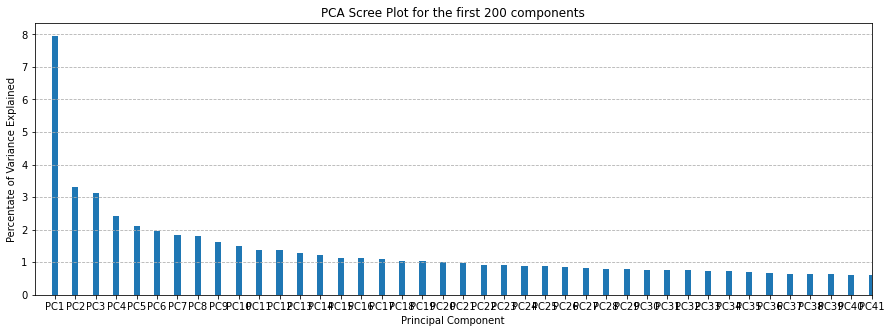

In [41]:
n_com = 200
columns = ["PC%d"%(i+1) for i in range(0,n_com)] 
plt.figure(figsize=(15, 5))
plt.bar(x= range(0,n_com), height=percent_variance[0:n_com], tick_label=columns,  width=0.3)
print("Cummulative variance explained of the first 200 components:","\n",np.cumsum(percent_variance[0:200]))
plt.grid(linestyle="--",axis="y")
plt.ylabel('Percentate of Variance Explained')
plt.xlim(-1,40)
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot for the first 200 components');

Cummulative varienec explained of the first 170 components: 
 [ 7.95 11.25 14.37 16.8  18.91 20.86 22.71 24.51 26.13 27.62 29.01 30.39
 31.66 32.88 34.02 35.15 36.25 37.3  38.33 39.33 40.3  41.23 42.16 43.05
 43.93 44.79 45.6  46.4  47.18 47.95 48.72 49.47 50.21 50.93 51.63 52.31
 52.96 53.6  54.23 54.85 55.46 56.06 56.65 57.22 57.77 58.32 58.85 59.38
 59.9  60.41 60.91 61.4  61.88 62.36 62.83 63.29 63.74 64.19 64.63 65.06
 65.48 65.9  66.32 66.73 67.14 67.54 67.94 68.33 68.72 69.1  69.48 69.85
 70.21 70.57 70.92 71.27 71.61 71.95 72.28 72.6  72.92 73.24 73.55 73.86
 74.17 74.47 74.77 75.06 75.35 75.64 75.92 76.19 76.46 76.73 77.   77.26
 77.52 77.78 78.03 78.28 78.52 78.76 79.   79.23 79.46 79.68 79.9  80.12
 80.34 80.55 80.76 80.97 81.18 81.38 81.58 81.78 81.98 82.17 82.36 82.55
 82.74 82.92 83.1  83.28 83.46 83.64 83.82 84.   84.17 84.34 84.51 84.68
 84.85 85.02 85.19 85.36 85.52 85.68 85.84 85.99 86.14 86.29 86.44 86.59
 86.74 86.89 87.04 87.19 87.34 87.49 87.63 87.77 87.91 88.05 8

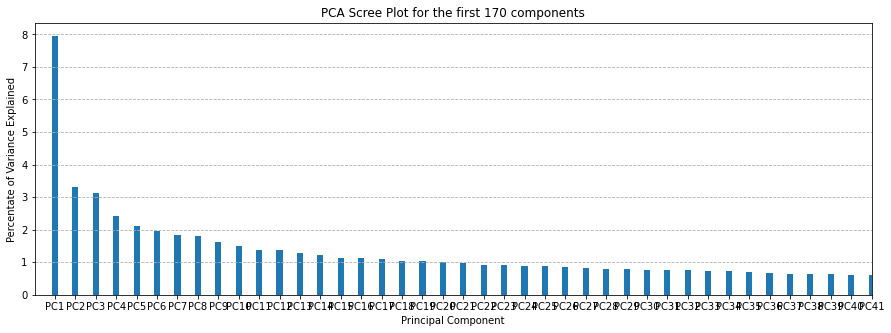

In [42]:
n_com = 170
columns = ["PC%d"%(i+1) for i in range(0,n_com)] 
plt.figure(figsize=(15, 5))
plt.bar(x= range(0,n_com), height=percent_variance[0:n_com], tick_label=columns,  width=0.3)
print("Cummulative varienec explained of the first 170 components:","\n",np.cumsum(percent_variance[0:170]))
plt.grid(linestyle="--",axis="y")
plt.ylabel('Percentate of Variance Explained')
plt.xlim(-1,40)
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot for the first 170 components');

We can observe, that we need around 170 components to retain 90% of the variance. So we can reduce the dimensionality with this criteria.

In [43]:
pca_new=decomposition.PCA(n_components=170)
pca_new.fit(X_normalized_A)
X_reduced=pca_new.transform(X_normalized_A)

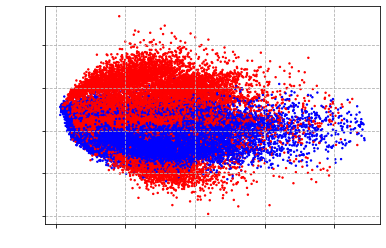

In [44]:
import matplotlib as mpl
from mpl_toolkits import mplot3d
cmap = mpl.colors.ListedColormap(['b','r'])
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=Y_A.flatten(),s=2,cmap=cmap)
plt.grid(linestyle="--")
## hide x and y ticks
plt.xticks(color='w')
plt.yticks(color='w');


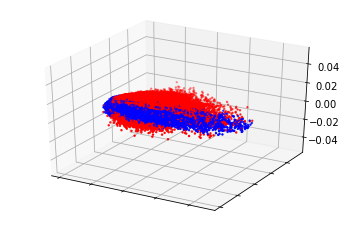

In [45]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_reduced[:,0],X_reduced[:,1],c=Y_A.flatten(),s=2,cmap=cmap)
plt.xticks(color='w')
plt.yticks(color='w');

## Split datasets

We are going to apply the cross-validation method to split the datasets into training and validation sets.

We will split the data set with these weights: Training set (60%), validation set (30%), and testing set (10%)

| | | Cross validation method  |   |   |
|:---|:-------------|:-----------|:------|:------|
|Training (20%) | Training (20%) | Training (20%) | **Validation** (30%)| Test (10%) |
|Training (20%)| Training (20%)| **Validation** (30%)| Training (20%)| Test (10%) |
|Training (20%)| **Validation** (30%)| Training (20%)| Training (20%)| Test (10%) |
|**Validation** (30%)| Training (20%)| Training (20%)| Training (20%)| Test (10%) |


We create the datasets:

We separate as 60% training data 30% validation and 10% test data 

In [46]:
X_train, X_test, X_valid  = np.split(X_reduced, [int(.6*len(X_reduced)), int(.7*len(X_reduced))])
y_train, y_test, y_valid  = np.split(Y_A, [int(.6*len(Y_A)), int(.7*len(Y_A))])

# Traditional machine learning methods

## Logistic Regression

Logistic regression is a supervised machine learning algorithm used to predict a binary outcome. In our case, we have labelled normal beats with a 0, and abnormal beats with a 1. Thus, we can use logistic regression as a classifier. 

This method is based on the concept of Maximum Likelihood estimation (the observed data should be most probable). 

For optimzing our hyparameters we will use cross validation method as mentioned before. This method will be implemented through Sklearn library with GridSearchCV module.

Parts of a genereal loss function:

![Loss_Function.png](Loss_Function.png)

                             Figure 2: Loss function parts (Image extracted from Stanford couse 2017).

The loss function for logistic regression is log loss, which is defined as follows:

\begin{equation}
Log loss=-\frac{1}{N}\sum_{i}^{N}[y_i\cdot ln(p_i) + (1-y_i)\cdot ln(1-p_i)]
\end{equation} 

where $N$ is the number of observations, $y$ is the true value, and $p$ is the prediction probability.

Hyperparameters to optimise:

- **Penalty**: To avoid overfitting, we are going to add a regularization term to our loss function. It 'tells' our classifier that the model should be 'simple', so it works on test data.
  In this case we are going to try L1 and L2 penalties.
  
  
- **C**: It is the inverse of regularization strength ($C=\frac{1}{\lambda}$). A high C means "trust training data", so, it gives high weight to the training data, and a lower weight to the complexity penalty. On the other hand, a low value says "this data may not be fully representative don't listen to it", hence, it gives more weight to this complexity penalty at the expense of fitting to the training data.


- **Class Weight**: When we made the exploratory analysis of the data, we saw that there was a larger number of abnormal heartbeats than in our real world. Thus, we could add more weight to normal heartbeats, however, we will analyse this hyperparameter performance when we discuss the results.


- **Solver**: Is the algorithm used in the optimization problem. Skleran literature can be checked to see the different types and meanings. We need to take into account that the choice of the algorithm depends on the penalty chosen (not all algorithms are compatible with all different types of penalties).

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,auc, classification_report

In [48]:
logistic_Reg = LogisticRegression()

First of all, we define all the metrics which will help us to decide which method is better for classifying the ECG recordings:

In [49]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)
def print_report(y_actual, y_pred, thresh):
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity

In [50]:
thresh = (sum(y_train)/len(y_train))[0]

As we mentioned before, depending on the penalty, there are only a couple solvers compatible with it. Thus, we are going to find the best hyperparameters for each type of penalty, and then discuss which one is best for our model:

In [51]:
#We define the hyperparameters if we apply L2 penalty
parameter_space_L2 = {"penalty": ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01], "solver": ["newton-cg", "lbfgs",
                    'sag'], 'max_iter': [1000]}   


#We apply cross validation to find best set of hyperparameters (5 folders). Best results will be based on the accuracy
clf_log_reg_L2 = GridSearchCV(logistic_Reg, parameter_space_L2, cv=5,    
                   scoring="accuracy", n_jobs=1)  
clf_log_reg_L2.fit(X_train, y_train.ravel())


print('If we use a L2 penalty the best parameter space is: ')
print("Best parameters:")
print(clf_log_reg_L2.best_params_)



If we use a L2 penalty the best parameter space is: 
Best parameters:
{'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [52]:
logistic_Reg_model = LogisticRegression(**clf_log_reg_L2.best_params_)

In [53]:
logistic_Reg_model.fit(X_train, y_train.ravel());

In [54]:
prediction= classification_report(y_valid.ravel(), logistic_Reg_model.predict(X_valid))

For L2 penalty, we obtain that:

In [55]:
print('Validation data for logistic regression with penalty L2:')
print_report(y_valid.ravel(), logistic_Reg_model.predict(X_valid), thresh);

Validation data for logistic regression with penalty L2:
accuracy:0.763
recall:0.374
precision:0.716
specificity:0.935
prevalence:0.306
 


We can observe graphically these results:

In [56]:
import seaborn as sns

#Function to make confusion matrices
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

<Figure size 288x288 with 0 Axes>

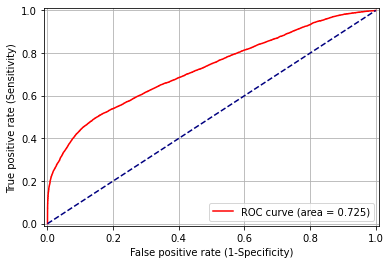

In [57]:
    
p1 = logistic_Reg_model.predict_proba(X_valid)[:,1]
tpr1=roc_curve(y_valid.ravel(),p1)[0] # True Positive rate
fpr1=roc_curve(y_valid.ravel(),p1)[1] # False Positive rate
AUC1=auc(tpr1,fpr1) # Area under Curve
    
plt.figure(figsize=(4,4))
plt.figure(2)
plt.plot(tpr1, fpr1, color='r',label='ROC curve (area = %0.3f)' % AUC1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
#plt.xticks(np.arange(0,1.1,.1))
#plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid();
plt.show()



In this graph, we can observe the Receiver Operating Characteristic (ROC). The area under the curve (AUC) represents how good our classifier is. Having an area of 0.724 means that our classifier has a 72.4% probability of making a correct classification.

In the figure axis, we can see two parameters. The true-positive rate, also known as sensitivity, corresponds to the probability of detection. Whereas, the false-positive refers to the probability of a false alarm.

Our classifier ROC curve is represented with a red line, while the blue dashed line refers to the behavior a random classifier would follow. Thus, the best possible prediction method would yield a point in the upper left corner of the ROC space representing 100% sensitivity (no false negatives) and 100% specificity (no false positives).

In the next figure we can see clearly this idea:

![Roc_curve.png](Roc_curve.png)

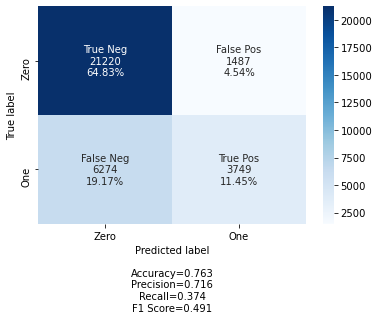

In [58]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
confusionmatrix = confusion_matrix(y_valid.ravel(), logistic_Reg_model.predict(X_valid));
make_confusion_matrix(confusionmatrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Here we see the confusion matrix. For our validation data there are 21200 normal segments and 3754 arrhythmia segments correctly classified. Nevertheless, the model classifies 6269 arrhythmias segments as normal ones, and 1507 normal segments as arrhythmias.

We can try now using L1 penalty:

In [59]:
logistic_reg_model2=LogisticRegression(penalty='l1', C=100, solver='liblinear', max_iter=1000)

In [60]:
logistic_reg_model2.fit(X_train, y_train.ravel());

In [61]:
prediction2= classification_report(y_valid.ravel(), logistic_reg_model2.predict(X_valid))

<Figure size 288x288 with 0 Axes>

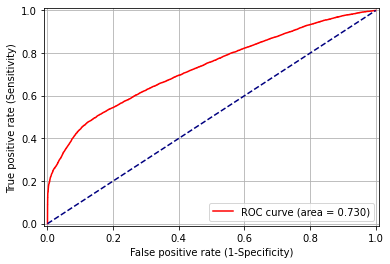

In [62]:
p2 = logistic_reg_model2.predict_proba(X_valid)[:,1]
tpr2=roc_curve(y_valid.ravel(),p2)[0] # True Positive rate
fpr2=roc_curve(y_valid.ravel(),p2)[1] # False Positive rate
AUC2=auc(tpr2,fpr2) # Area under Curve
    
plt.figure(figsize=(4,4))
plt.figure(2)
plt.plot(tpr2, fpr2, color='r',label='ROC curve (area = %0.3f)' % AUC2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
#plt.xticks(np.arange(0,1.1,.1))
#plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid();
plt.show()

We can see that for this model, the AUC is higher than with L2 penalty. 

In [63]:
print('Validation data for logistic regression with penalty L1:')
print_report(y_valid.ravel(), logistic_reg_model2.predict(X_valid), thresh);

Validation data for logistic regression with penalty L1:
accuracy:0.763
recall:0.393
precision:0.702
specificity:0.926
prevalence:0.306
 


The accuracy is slightly higher too. Let's plot the confusion matrix:

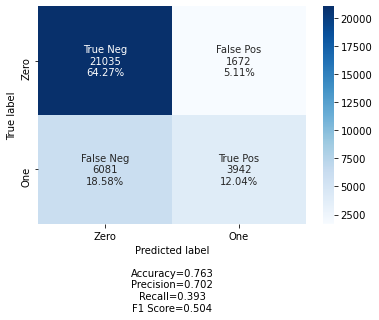

In [64]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
confusionmatrix = confusion_matrix(y_valid.ravel(), logistic_reg_model2.predict(X_valid));
make_confusion_matrix(confusionmatrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

$\;\;\;\;\;\;$


$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

|Penalty| Accuracy| Precision |  Recall |  F1 score |
|:------|:--------|:-----------|:------|:------|
|L2     | 0.762 |0.714 | 0.374 | 0.491|
|L1     | 0.763 | 0.700 | 0.397 | 0.507|

                                          Table 1: Metrics logistic regression model (L1 vs L2)

By comparing the confusion matrices of both methods, we can conclude that the second method is slightly more accurate than the first one. However, there are also other metrics we need to take into account.

If we analyze the precision, which gives us an idea of the proportion of positive identifications that are correct, the first method is more precise than the second one. In other words, the first method which has a precision of 0.714, means that when it predicts an arrhythmia, it is correct 71.4% of the time.

Recall is another interesting metric for studying how good our classifier is. Recall gives us the proportion of actual positives that were identified correctly. In our case, the second method has a higher value for recall than the second one. It identifies 39.7% of all arrhythmias.
The metric F1 score is defined as the harmonic mean of precision and recall. Thus, the range of values of F1 score goes from 0 to 1; the closer it is to 1, the better the model.

For all this, we will use the model with L1 penalty as our logistic regression method with the best hyperparameters for classifying testing data.

We can compare the AUC of both methods:

<Figure size 288x288 with 0 Axes>

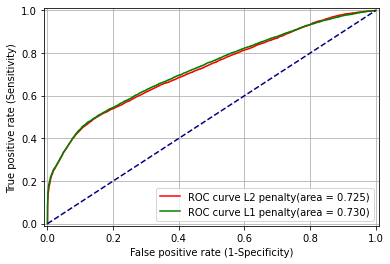

In [65]:
plt.figure(figsize=(4,4))
plt.figure(2)
plt.plot(tpr1, fpr1, color='r',label='ROC curve L2 penalty(area = %0.3f)' % AUC1)
plt.plot(tpr2, fpr2, color='g',label='ROC curve L1 penalty(area = %0.3f)' % AUC2)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
#plt.xticks(np.arange(0,1.1,.1))
#plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid();
plt.show()

## Decision Trees

As logistic regression, Decision trees is a supervised machine learning algorithm. This model, uses the dataset features to create (yes and no) questions and continually split the dataset until you isolate all data points belonging to each class.

For Decision trees the loss function should evaluate each split based on the proportion of data points belonging to each class before and after the split. We have different loss functions to evaluate the quality of a split. Thus, we are going to try three of them and optimise the rest of hyperparamenters. Afterwards, we will keep the best classifier.

Loss functions:

- **Gini Impurity**: is a measure of variance across the different classes, so, it is calculated by subtracting the sum of the squared probabilities of each class from one. We can see the mathematical form:

\begin{equation}
G(node) =\sum_{i}^{N}[p_i\cdot (1-p_i)]
\end{equation} 

   where $p_i$ is the probability of picking a data point from class $i$, and $(1-p_i)$ is the probability of not picking a data point from class $i$.

- **Entropy**:  is a measure of disorder or uncertainty. In our case, we only have two classes so the entropy is measured between 0 and 1. This loss function is defined as it follows:

\begin{equation}
E(node) =\sum_{i}^{N}[-p_i\cdot log(p_i)]
\end{equation} 

A split is only performed when the entropy of the parent node is higher than the entropy of each of the resulting nodes. Otherwise, the split is not locally optimal. 

- **Log loss**: the one we used for logistic regression

Hyperparameters to optimise:

- **Splitter**: this hyperparameter chooses how to split each node. Random Splitter, initiates a random split on each chosen feature, whereas Best Splitter goes through all possible splits on each chosen feature and takes the one with highest importance.

- **Min samples split**: specifies the minimum number of samples required to split an internal node. An internal node will have further splits (children)

- **Min samples leaf**: specifies the minimum number of samples required to be at a leaf node. A leaf is a node without any children (without any further splits),

In [66]:
from sklearn.tree import DecisionTreeClassifier
Decision_Tree = DecisionTreeClassifier()

We are going to use cross validation method for obtaining the best hyperparameters. Due to the fact that the training process takes a long time, we are going to compute it once and then introduce the hyperparameters manually, in case we need to restart the notebook so that we do not have to repeat the cross validation method.

**Gini Impurity**

In [67]:
Decision_Tree_Gini= DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_leaf = 100, 
                                             min_samples_split =250)

In [68]:
Decision_Tree_Gini.fit(X_train, y_train.ravel());

In [69]:
prediction_Gini= classification_report(y_valid.ravel(), Decision_Tree_Gini.predict(X_valid))

In [70]:
print('Validation data for Decision Tree with Gini:')
print_report(y_valid.ravel(), Decision_Tree_Gini.predict(X_valid), thresh);

Validation data for Decision Tree with Gini:
accuracy:0.775
recall:0.463
precision:0.702
specificity:0.913
prevalence:0.306
 


**Entropy**

In [71]:
Decision_Tree_entropy= DecisionTreeClassifier(criterion='entropy', splitter='best', min_samples_leaf = 100, 
                                             min_samples_split =50)

In [72]:
Decision_Tree_entropy.fit(X_train, y_train.ravel());

In [73]:
prediction_entropy= classification_report(y_valid.ravel(), Decision_Tree_entropy.predict(X_valid))

In [74]:
print('Validation data for Decision Tree with entropy:')
print_report(y_valid.ravel(), Decision_Tree_entropy.predict(X_valid), thresh);

Validation data for Decision Tree with entropy:
accuracy:0.771
recall:0.506
precision:0.667
specificity:0.889
prevalence:0.306
 


**Log loss**

In [75]:
Decision_Tree_LogLoss= DecisionTreeClassifier(criterion='log_loss', splitter='best', min_samples_leaf = 10, 
                                             min_samples_split =50)

In [76]:
Decision_Tree_LogLoss.fit(X_train, y_train.ravel());

In [77]:
prediction_entropy= classification_report(y_valid.ravel(), Decision_Tree_LogLoss.predict(X_valid))

In [78]:
print('Validation data for Decision Tree with log loss:')
print_report(y_valid.ravel(), Decision_Tree_LogLoss.predict(X_valid), thresh);

Validation data for Decision Tree with log loss:
accuracy:0.750
recall:0.497
precision:0.613
specificity:0.862
prevalence:0.306
 


We can plot the confussion matrices of the two best decision trees models:

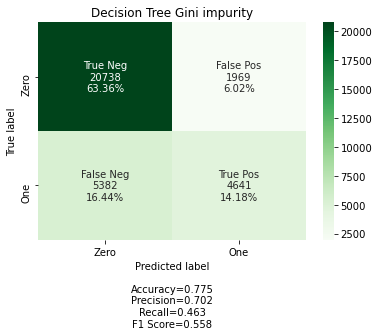

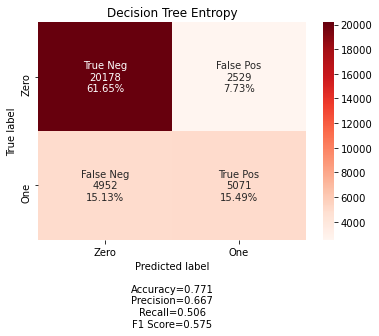

In [79]:

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
confusionmatrix = confusion_matrix(y_valid.ravel(), Decision_Tree_Gini.predict(X_valid));
make_confusion_matrix(confusionmatrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Greens', 
                     title='Decision Tree Gini impurity')

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
confusionmatrix = confusion_matrix(y_valid.ravel(), Decision_Tree_entropy.predict(X_valid));
make_confusion_matrix(confusionmatrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds',
                     title = 'Decision Tree Entropy')



We can see that the Decision Tree Gini impurity model is more accurate. However, the F1 score shows that the Decision Tree entropy model is a better classifier

We can graph the ROC curves:

<Figure size 288x288 with 0 Axes>

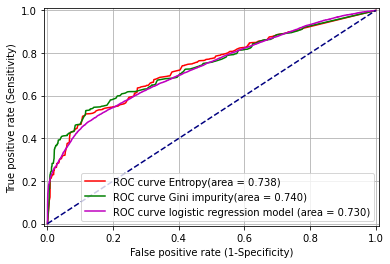

In [80]:
p3 = logistic_reg_model2.predict_proba(X_valid)[:,1]
tpr3=roc_curve(y_valid.ravel(),p3)[0] # True Positive rate
fpr3=roc_curve(y_valid.ravel(),p3)[1] # False Positive rate
AUC3=auc(tpr3,fpr3) # Area under Curve

p4 = Decision_Tree_Gini.predict_proba(X_valid)[:,1]
tpr4=roc_curve(y_valid.ravel(),p4)[0] # True Positive rate
fpr4=roc_curve(y_valid.ravel(),p4)[1] # False Positive rate
AUC4=auc(tpr4,fpr4) # Area under Curve

p5 = Decision_Tree_entropy.predict_proba(X_valid)[:,1]
tpr5=roc_curve(y_valid.ravel(),p5)[0] # True Positive rate
fpr5=roc_curve(y_valid.ravel(),p5)[1] # False Positive rate
AUC5=auc(tpr5,fpr5) # Area under Curve

plt.figure(figsize=(4,4))
plt.figure(2)
plt.plot(tpr5, fpr5, color='r',label='ROC curve Entropy(area = %0.3f)' % AUC5)
plt.plot(tpr4, fpr4, color='g',label='ROC curve Gini impurity(area = %0.3f)' % AUC4)
plt.plot(tpr3, fpr3, color='m', label='ROC curve logistic regression model (area = %0.3f)' %AUC3)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
#plt.xticks(np.arange(0,1.1,.1))
#plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid();
plt.show()

We can see that the AUC of gini impurity model is the highest. Thus, for now, this is our best model.

## Random forest

This method is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

It uses same loss functions as decision tree method (Gini, entropy and loss function)

Hyperparameters to optimise:

- **Number of estimators**: The number of trees in the forest.

- **Min samples leaf** and  **Min samples split** (explained in decision tree method)

- **Maximum features**: The number of features to consider when looking for the best split

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
Random_Forest_Gini= RandomForestClassifier(criterion='gini', min_samples_split = 100, 
                                             min_samples_leaf =250, max_features='sqrt', n_estimators=100)

In [83]:
Random_Forest_Gini.fit(X_train, y_train.ravel());

In [84]:
prediction_RGini= classification_report(y_valid.ravel(), Random_Forest_Gini.predict(X_valid))

In [85]:
print('Validation data for Random Forest with Gini:')
print_report(y_valid.ravel(),Random_Forest_Gini.predict(X_valid), thresh);

Validation data for Random Forest with Gini:
accuracy:0.806
recall:0.394
precision:0.937
specificity:0.988
prevalence:0.306
 


In [86]:
Random_Forest_Entropy= RandomForestClassifier(criterion='entropy', min_samples_split = 100, 
                                             min_samples_leaf =250, max_features='sqrt', n_estimators=100)

In [87]:
Random_Forest_Entropy.fit(X_train, y_train.ravel());

In [88]:
prediction_REntropy= classification_report(y_valid.ravel(), Random_Forest_Entropy.predict(X_valid))

In [89]:
print('Validation data for Random Forest with Entropy:')
print_report(y_valid.ravel(),Random_Forest_Entropy.predict(X_valid), thresh);

Validation data for Random Forest with Entropy:
accuracy:0.802
recall:0.379
precision:0.939
specificity:0.989
prevalence:0.306
 


In [90]:
Random_Forest_Logloss= RandomForestClassifier(criterion='log_loss', min_samples_split = 100, 
                                             min_samples_leaf =250, max_features='sqrt', n_estimators=100)

In [91]:
Random_Forest_Logloss.fit(X_train, y_train.ravel());

In [92]:
prediction_RLogLoss= classification_report(y_valid.ravel(), Random_Forest_Logloss.predict(X_valid))

In [93]:
print('Validation data for Random Forest with Log loss:')
print_report(y_valid.ravel(),Random_Forest_Logloss.predict(X_valid), thresh);

Validation data for Random Forest with Log loss:
accuracy:0.806
recall:0.387
precision:0.947
specificity:0.990
prevalence:0.306
 


<Figure size 288x288 with 0 Axes>

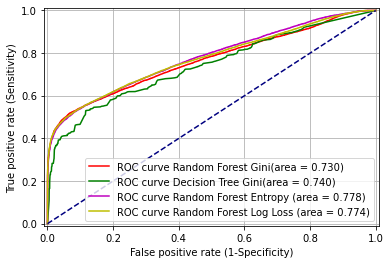

In [94]:
p6 = Random_Forest_Gini.predict_proba(X_valid)[:,1]
tpr6=roc_curve(y_valid.ravel(),p6)[0] # True Positive rate
fpr6=roc_curve(y_valid.ravel(),p6)[1] # False Positive rate
AUC6=auc(tpr3,fpr3) # Area under Curve

p7 = Random_Forest_Entropy.predict_proba(X_valid)[:,1]
tpr7=roc_curve(y_valid.ravel(),p7)[0] # True Positive rate
fpr7=roc_curve(y_valid.ravel(),p7)[1] # False Positive rate
AUC7=auc(tpr7,fpr7) # Area under Curve

p8 = Random_Forest_Logloss.predict_proba(X_valid)[:,1]
tpr8=roc_curve(y_valid.ravel(),p8)[0] # True Positive rate
fpr8=roc_curve(y_valid.ravel(),p8)[1] # False Positive rate
AUC8=auc(tpr8,fpr8) # Area under Curve

plt.figure(figsize=(4,4))
plt.figure(2)
plt.plot(tpr6, fpr6, color='r',label='ROC curve Random Forest Gini(area = %0.3f)' % AUC6)
plt.plot(tpr4, fpr4, color='g',label='ROC curve Decision Tree Gini(area = %0.3f)' % AUC4)
plt.plot(tpr7, fpr7, color='m', label='ROC curve Random Forest Entropy (area = %0.3f)' %AUC7)
plt.plot(tpr8, fpr8, color='y', label='ROC curve Random Forest Log Loss (area = %0.3f)' %AUC8)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
#plt.xticks(np.arange(0,1.1,.1))
#plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid();
plt.show()

From the ROC curves, we can conclude that the best classifier is the Decision Tree model with Log Loss function. So, from all traditional methods, we are going to keep this one as the best of them.

Let's print its confussion matrix:

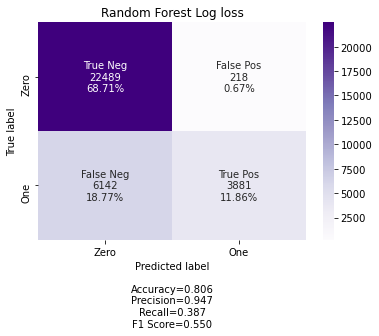

In [95]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
confusionmatrix = confusion_matrix(y_valid.ravel(),Random_Forest_Logloss.predict(X_valid));
make_confusion_matrix(confusionmatrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Purples',
                     title = 'Random Forest Log loss')


We have reached an accuracy of approximately 0.8 with this model. In addition, we have by far the best precision of all models. The mean precision of the other models was 0.7, while in this case is 0.932. This is reflected in the confusion matrix, in which we only have 273 normal segments classified as arrhythmias, however, we still have a large number of arrhythmias classified as normal segments (6297).

Regarding the recall metric, we have a low average value for it, meaning that it only classifies correctly the 37.2 % of arrhythmias. Thus, this leads us to think that we need more arrhythmia samples in our dataset.

To sum up, this classifier works excellently for detecting normal segments, nevertheless, it is still a bad classifier for detecting correctly arrhythmias.

# Deep learning methods

For building our deep learning methods, Keras API will be used.

## Dense neural network

We wil start by making a dense neural network with Keras

In [96]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, MaxPooling1D
from keras.utils import to_categorical

Our model will consist on a first layer with ReLU activation function, then a dropout layer, and finally another layer with a sigmoid activation function.

We start with ReLU activation function due to the fact that converges much faster than sigmoid or tanh, and it is very computationally efficient. Its form is: 

\begin{equation}
R(z) = max(0,z)
\end{equation} 

Another point worth noting is that due to its definition, it does not saturate in the positive region:
![ReLU.png](ReLU.png)

With dropout we are only keeping a neuron active with some probability, this probability is an hyperparameter we need to optimise. This layer, helps with the overfitting problem.

In our last layer we will be using sigmoid as the activation function.

In [97]:
model1 = Sequential()
model1.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dropout(rate=0.25))
model1.add(Dense(1, activation = 'sigmoid'))

As we are building a binary classification model, it may be a good idea to use binary crossentropy loss function. Afterwards, we will use Hinge loss function and we will compare the results.

For optimising, choosing Adam is always a good starting point, this optimiser is a stochastic gradient descent method, based on adaptive estimation of first-order and second-order moments.

In [98]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The model will be trained for 15 epochs. We should be careful, not to overfit or underfit it.

In [99]:
model1.fit(X_train, y_train.ravel(), batch_size=32, epochs=18, verbose=1)

Epoch 1/18
2046/2046 [==============================] - 3s 1ms/step - loss: 0.5885 - accuracy: 0.6944
Epoch 2/18
2046/2046 [==============================] - 2s 1ms/step - loss: 0.4723 - accuracy: 0.7838
Epoch 3/18
2046/2046 [==============================] - 2s 1ms/step - loss: 0.4110 - accuracy: 0.8178
Epoch 4/18
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3835 - accuracy: 0.8283
Epoch 5/18
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3672 - accuracy: 0.8356
Epoch 6/18
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3547 - accuracy: 0.8420
Epoch 7/18
2046/2046 [==============================] - 3s 1ms/step - loss: 0.3429 - accuracy: 0.8475
Epoch 8/18
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3315 - accuracy: 0.8547
Epoch 9/18
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3216 - accuracy: 0.8620
Epoch 10/18
2046/2046 [==============================] - 2s 1ms/step - loss: 0.312

In [100]:
y_valid_preds_dense=model1.predict(X_valid, verbose=1)

1023/1023 [==============================] - 1s 862us/step


In [101]:

print('Validation data for Dense Neural Network A:')
print_report(y_valid,y_valid_preds_dense, thresh);

Validation data for Dense Neural Network A:
accuracy:0.773
recall:0.585
precision:0.643
specificity:0.856
prevalence:0.306
 


We have the highest value for recall until now, which is a positive note for us, as we were struggling on classifying properly the arrhythmias.

1023/1023 [==============================] - 1s 618us/step


<Figure size 288x288 with 0 Axes>

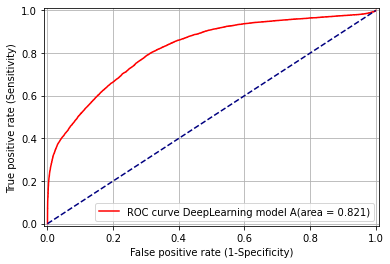

In [102]:
p9=model1.predict(X_valid, verbose=1)
tpr9=roc_curve(y_valid.ravel(),p9)[0] # True Positive rate
fpr9=roc_curve(y_valid.ravel(),p9)[1] # False Positive rate
AUC9=auc(tpr9,fpr9) # Area under Curve

plt.figure(figsize=(4,4))
plt.figure(2)
plt.plot(tpr9, fpr9, color='r',label='ROC curve DeepLearning model A(area = %0.3f)' % AUC9)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
#plt.xticks(np.arange(0,1.1,.1))
#plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid();
plt.show()

We can clearly see that this deep learning model is much better classifier than all the traditional machine learning methods.

Let's try to apply Hinge loss function:

In [103]:
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dropout(rate=0.25))
model2.add(Dense(1, activation = 'sigmoid'))

In [104]:
model2.compile(loss='Hinge', optimizer='adam', metrics=['accuracy'])

In [105]:
model2.fit(X_train, y_train.ravel(), batch_size=32, epochs=7, verbose=1)

Epoch 1/7
2046/2046 [==============================] - 2s 942us/step - loss: 1.0185 - accuracy: 0.6778
Epoch 2/7
2046/2046 [==============================] - 2s 990us/step - loss: 1.0002 - accuracy: 0.6777
Epoch 3/7
2046/2046 [==============================] - 3s 1ms/step - loss: 1.0000 - accuracy: 0.6777
Epoch 4/7
2046/2046 [==============================] - 3s 1ms/step - loss: 1.0000 - accuracy: 0.6777
Epoch 5/7
2046/2046 [==============================] - 3s 1ms/step - loss: 1.0000 - accuracy: 0.6777
Epoch 6/7
2046/2046 [==============================] - 3s 1ms/step - loss: 1.0000 - accuracy: 0.6777
Epoch 7/7
2046/2046 [==============================] - 3s 1ms/step - loss: 1.0000 - accuracy: 0.6777


We can see that loss does not decrease more, so the accuracy is of maximum 0.677

1023/1023 [==============================] - 1s 836us/step


<Figure size 288x288 with 0 Axes>

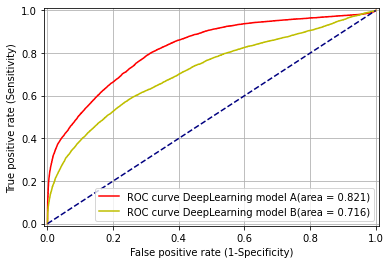

In [106]:
p10=model2.predict(X_valid, verbose=1)
tpr10=roc_curve(y_valid.ravel(),p10)[0] # True Positive rate
fpr10=roc_curve(y_valid.ravel(),p10)[1] # False Positive rate
AUC10=auc(tpr10,fpr10) # Area under Curve

plt.figure(figsize=(4,4))
plt.figure(2)
plt.plot(tpr9, fpr9, color='r',label='ROC curve DeepLearning model A(area = %0.3f)' % AUC9)
plt.plot(tpr10, fpr10, color='y',label='ROC curve DeepLearning model B(area = %0.3f)' % AUC10)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
#plt.xticks(np.arange(0,1.1,.1))
#plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid();
plt.show()

We can see big differences between both model with different loss functions.

We can change the optimiser of the first deep learning model, and try to use Adamax, which is a variant of Adam based on the infinity norm

In [107]:
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model3.add(Dropout(rate=0.25))
model3.add(Dense(1, activation = 'sigmoid'))

In [108]:
model3.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [109]:
model3.fit(X_train, y_train.ravel(), batch_size=32, epochs=18, verbose=1)

Epoch 1/18
2046/2046 [==============================] - 3s 1ms/step - loss: 0.5799 - accuracy: 0.6981
Epoch 2/18
2046/2046 [==============================] - 2s 1ms/step - loss: 0.4539 - accuracy: 0.7953
Epoch 3/18
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3959 - accuracy: 0.8239
Epoch 4/18
2046/2046 [==============================] - 3s 1ms/step - loss: 0.3710 - accuracy: 0.8335
Epoch 5/18
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3555 - accuracy: 0.8405
Epoch 6/18
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3412 - accuracy: 0.8490
Epoch 7/18
2046/2046 [==============================] - 3s 1ms/step - loss: 0.3277 - accuracy: 0.8580
Epoch 8/18
2046/2046 [==============================] - 3s 1ms/step - loss: 0.3154 - accuracy: 0.8664
Epoch 9/18
2046/2046 [==============================] - 3s 1ms/step - loss: 0.3044 - accuracy: 0.8749
Epoch 10/18
2046/2046 [==============================] - 2s 1ms/step - loss: 0.294

In [110]:
y_valid_preds_dense3=model3.predict(X_valid, verbose=1)

1023/1023 [==============================] - 1s 695us/step


In [111]:
print('Validation data for Dense Neural Network C:')
print_report(y_valid,y_valid_preds_dense3, thresh);

Validation data for Dense Neural Network C:
accuracy:0.790
recall:0.534
precision:0.709
specificity:0.903
prevalence:0.306
 


1023/1023 [==============================] - 1s 764us/step


<Figure size 288x288 with 0 Axes>

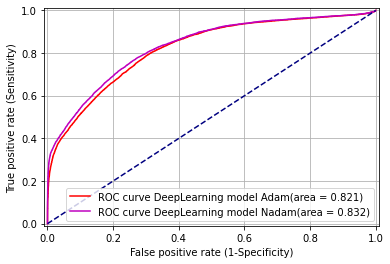

In [112]:
p11=model3.predict(X_valid, verbose=1)
tpr11=roc_curve(y_valid.ravel(),p11)[0] # True Positive rate
fpr11=roc_curve(y_valid.ravel(),p11)[1] # False Positive rate
AUC11=auc(tpr11,fpr11) # Area under Curve

plt.figure(figsize=(4,4))
plt.figure(2)
plt.plot(tpr9, fpr9, color='r',label='ROC curve DeepLearning model Adam(area = %0.3f)' % AUC9)
plt.plot(tpr11, fpr11, color='m',label='ROC curve DeepLearning model Nadam(area = %0.3f)' % AUC11)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
#plt.xticks(np.arange(0,1.1,.1))
#plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid();
plt.show()

We can see that Nadam optimizer works better than Adam one. Both are RMSprop but Adam is a RMSprop with momentum and Nadam a RMSprop with Nesterov momentum. In the next figure we can see the slight difference:

![Nesterov.jpeg](Nesterov.jpeg)

Figure extracted from [Stanford CS231n course](https://cs231n.github.io/neural-networks-3/#sgd).

## Convolutional Neural Network

As we are working with time series data, the input and ouput data is 2 dimensional (ECG recording), we are going to build 1D convolutional neural networks. In this type of CNN, the kernel (filter) moves just in 1 direction.

First of all, we reshape our inputs to the format (Samples, time steps, features = 1)

In [113]:
X_train_CNN = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_valid_CNN = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))

print(X_train_CNN.shape)
print(X_valid_CNN.shape)

(65459, 170, 1)
(32730, 170, 1)


We build our CNN

In [114]:
from keras.layers import Conv1D

In [115]:
model6 = Sequential()

model6.add(Conv1D(filters=150, kernel_size=5, activation='relu', input_shape=(170,1)))
           
model6.add(Dropout(rate=0.25))

model6.add(Flatten())

model6.add(Dense(1,activation='sigmoid'))

In [116]:
model6.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [117]:
model6.fit(X_train_CNN, y_train, batch_size=32, epochs=18, verbose=1)

Epoch 1/18
2046/2046 [==============================] - 21s 10ms/step - loss: 0.5434 - accuracy: 0.7307
Epoch 2/18
2046/2046 [==============================] - 20s 10ms/step - loss: 0.3974 - accuracy: 0.8245
Epoch 3/18
2046/2046 [==============================] - 18s 9ms/step - loss: 0.3505 - accuracy: 0.8440
Epoch 4/18
2046/2046 [==============================] - 18s 9ms/step - loss: 0.3221 - accuracy: 0.8595
Epoch 5/18
2046/2046 [==============================] - 21s 10ms/step - loss: 0.2980 - accuracy: 0.8728
Epoch 6/18
2046/2046 [==============================] - 21s 10ms/step - loss: 0.2793 - accuracy: 0.8842
Epoch 7/18
2046/2046 [==============================] - 21s 10ms/step - loss: 0.2639 - accuracy: 0.8929
Epoch 8/18
2046/2046 [==============================] - 22s 11ms/step - loss: 0.2522 - accuracy: 0.8998
Epoch 9/18
2046/2046 [==============================] - 22s 11ms/step - loss: 0.2429 - accuracy: 0.9056
Epoch 10/18
2046/2046 [==============================] - 21s 10ms/

In [118]:
y_valid_preds_cnn=model6.predict(X_valid_CNN, verbose=1)

1023/1023 [==============================] - 2s 2ms/step


In [119]:
print('Validation data for CNN:')
print_report(y_valid,y_valid_preds_cnn, thresh);

Validation data for CNN:
accuracy:0.782
recall:0.510
precision:0.696
specificity:0.902
prevalence:0.306
 


1023/1023 [==============================] - 2s 2ms/step


<Figure size 288x288 with 0 Axes>

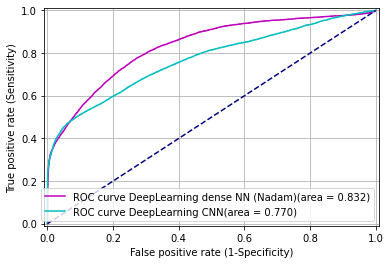

In [120]:
p12=model6.predict(X_valid_CNN, verbose=1)
tpr12=roc_curve(y_valid.ravel(),p12)[0] # True Positive rate
fpr12=roc_curve(y_valid.ravel(),p12)[1] # False Positive rate
AUC12=auc(tpr12,fpr12) # Area under Curve

plt.figure(figsize=(4,4))
plt.figure(2)
plt.plot(tpr11, fpr11, color='m',label='ROC curve DeepLearning dense NN (Nadam)(area = %0.3f)' % AUC11)
plt.plot(tpr12, fpr12, color='c',label='ROC curve DeepLearning CNN(area = %0.3f)' % AUC12)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
#plt.xticks(np.arange(0,1.1,.1))
#plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid();
plt.show()

We can see that our CNN need more epochs to reach a good AUC, while the first dense NN need fewer to achieve better results.

## Recurrent Neural Network

In [121]:
from keras.layers import Bidirectional, LSTM

In [122]:
model = Sequential()
model.add(Bidirectional(LSTM(64, input_shape=(X_train_CNN.shape[1], X_train_CNN.shape[2]))))
model.add(Dropout(rate = 0.25))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(
                loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [123]:
model.fit(X_train_CNN, y_train, batch_size = 32, epochs= 1, verbose = 1)

2046/2046 [==============================] - 111s 52ms/step - loss: 0.6297 - accuracy: 0.6776


In [124]:
y_valid_preds_cnn=model.predict(X_valid_CNN, verbose=1)

1023/1023 [==============================] - 19s 18ms/step


1023/1023 [==============================] - 18s 17ms/step


<Figure size 288x288 with 0 Axes>

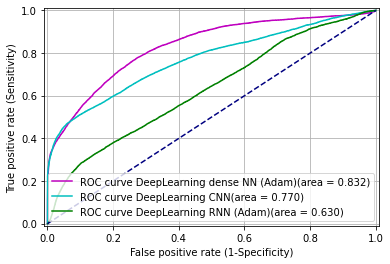

In [125]:
p13=model.predict(X_valid_CNN, verbose=1)
tpr13=roc_curve(y_valid.ravel(),p13)[0] # True Positive rate
fpr13=roc_curve(y_valid.ravel(),p13)[1] # False Positive rate
AUC13=auc(tpr13,fpr13) # Area under Curve

plt.figure(figsize=(4,4))
plt.figure(2)
plt.plot(tpr11, fpr11, color='m',label='ROC curve DeepLearning dense NN (Adam)(area = %0.3f)' % AUC11)
plt.plot(tpr12, fpr12, color='c',label='ROC curve DeepLearning CNN(area = %0.3f)' % AUC12)
plt.plot(tpr13, fpr13, color='g',label='ROC curve DeepLearning RNN (Adam)(area = %0.3f)' % AUC13)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
#plt.xticks(np.arange(0,1.1,.1))
#plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid();
plt.show()

We can see that RNN is the worst model, but we have to take into account that we only trained it for 1 epoch, due to the fact that it is the most time-consuming. Maybe, by training it for 18 epochs, we can achieve the same or better results than the other two neural networks.

To put the matter in a nutshell, our best model for classifying the ECG recordings is the dense NN with Adam optimizer. Thus, we are going to use it to classify our test data:

In [126]:
y_test_preds_dense=model1.predict(X_test, verbose=1)

341/341 [==============================] - 0s 574us/step


In [127]:
print('Test data metrics Dense NN:')
thresh2 = (sum(y_test)/len(y_test))[0]
print_report(y_test,y_test_preds_dense, thresh2);

Test data metrics Dense NN:
accuracy:0.728
recall:0.447
precision:0.541
specificity:0.843
prevalence:0.292
 


341/341 [==============================] - 0s 611us/step


<Figure size 288x288 with 0 Axes>

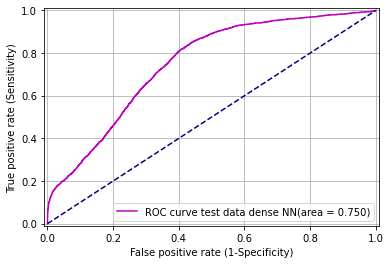

In [128]:
p_test=model3.predict(X_test, verbose=1)
tpr_test=roc_curve(y_test.ravel(),p_test)[0] # True Positive rate
fpr_test=roc_curve(y_test.ravel(),p_test)[1] # False Positive rate
AUC_test=auc(tpr_test,fpr_test) # Area under Curve

plt.figure(figsize=(4,4))
plt.figure(2)
plt.plot(tpr_test, fpr_test, color='m',label='ROC curve test data dense NN(area = %0.3f)' % AUC_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
#plt.xticks(np.arange(0,1.1,.1))
#plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid();
plt.show()

We achieved to building a classifier with 0.802 AUC in the ROC curve, so we can consider we built a good classifier. However, if we analyze the metrics, we can see there is a low value for recall, which means that there is a big number of arrhythmias that are not classified properly. This leads us to think, that we need more arrhythmias in our dataset so that the classifier is well trained.

Another point worth noting is that we only gave the test dataset a 10% of the whole dataset. This is a really small number compared to the validation data, hence, our results are not fully representative. We should have given the same weight to training and test sets and increased the weight of the test data set.

# MIT-BIH Supraventricular Arrhythmia Database

As we mentioned in the exploratory analysis, we have another dataset but with a different frequency sampling in the ECG recordings from the one we were working with. In this case, we have more samples and more arrhythmias than in the first dataset, so, we can check if our classifier improves by using this database. We will also, change the weight for training, validation and test datasets:

First of all we analyse our dataset shape:

In [129]:
X_B

array([[-0.105, -0.085, -0.135, ..., -0.025,  0.135,  0.485],
       [-0.045, -0.045, -0.075, ...,  1.18 ,  1.505,  1.255],
       [ 0.035,  0.335,  0.97 , ...,  1.395,  1.115,  0.475],
       ...,
       [-0.07 , -0.04 , -0.04 , ..., -0.15 , -0.3  , -0.14 ],
       [-0.39 , -0.38 , -0.39 , ..., -0.08 , -0.1  , -0.06 ],
       [-0.5  , -0.51 , -0.53 , ..., -0.43 , -0.47 , -0.49 ]])

In [130]:
X_B.shape

(183978, 680)

In [131]:
Y_B

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [132]:
Y_B.shape

(183978, 1)

We will follow same process as we did for our first dataset. We will first normalise it and apply PCA to reduce dimensionality.

### Normalization

In [133]:
X_normalized_B = normalize(X_B, norm='l1')

In [134]:
X_normalized_B

array([[-0.00111193, -0.00090014, -0.00142963, ..., -0.00026475,
         0.00142963,  0.00513608],
       [-0.00048578, -0.00048578, -0.00080963, ...,  0.01273817,
         0.01624656,  0.0135478 ],
       [ 0.0003609 ,  0.00345432,  0.01000206, ...,  0.01438441,
         0.01149722,  0.00489792],
       ...,
       [-0.00022078, -0.00012616, -0.00012616, ..., -0.0004731 ,
        -0.00094621, -0.00044156],
       [-0.00118939, -0.00115889, -0.00118939, ..., -0.00024398,
        -0.00030497, -0.00018298],
       [-0.00158346, -0.00161513, -0.00167846, ..., -0.00136177,
        -0.00148845, -0.00155179]])

### PCA

In [135]:
pca.fit(X_normalized_B)

PCA()

We print the scree plot:

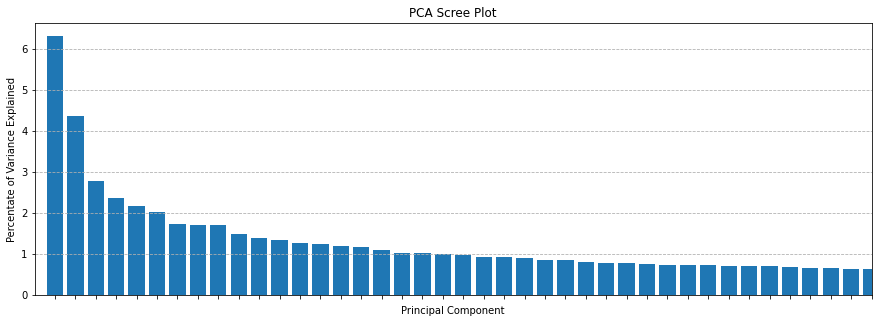

In [136]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ["PC%d"%(i+1) for i in range(0,X_normalized_B.shape[1])] 

plt.figure(figsize=(15, 5))
plt.bar(x= range(0,X_normalized_B.shape[1]), height=percent_variance, tick_label="")
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(-1,40)
plt.title('PCA Scree Plot')
plt.grid(linestyle="--",axis="y");

In [137]:
print('We have in total %i components' %(X_normalized_B.shape[1]))

We have in total 680 components


As we did with the first dataset, we will keep the 90% of the accumulative variance.

Cummulative variance explained of the first 200 components: 
 [ 6.31 10.67 13.45 15.8  17.97 19.99 21.72 23.42 25.11 26.59 27.98 29.32
 30.58 31.82 33.   34.17 35.27 36.3  37.32 38.31 39.28 40.2  41.11 42.01
 42.85 43.69 44.5  45.28 46.05 46.79 47.52 48.25 48.97 49.68 50.38 51.07
 51.74 52.4  53.05 53.69 54.32 54.93 55.54 56.13 56.72 57.3  57.86 58.41
 58.96 59.5  60.03 60.56 61.08 61.59 62.08 62.57 63.06 63.53 64.   64.46
 64.92 65.37 65.81 66.24 66.67 67.1  67.52 67.93 68.34 68.74 69.14 69.54
 69.93 70.31 70.69 71.06 71.43 71.8  72.16 72.52 72.87 73.22 73.56 73.89
 74.22 74.55 74.87 75.19 75.51 75.83 76.14 76.45 76.76 77.06 77.36 77.66
 77.95 78.24 78.52 78.8  79.07 79.34 79.61 79.88 80.15 80.41 80.67 80.92
 81.17 81.42 81.66 81.9  82.14 82.38 82.61 82.84 83.07 83.3  83.52 83.74
 83.96 84.18 84.39 84.6  84.81 85.02 85.23 85.43 85.63 85.83 86.03 86.22
 86.41 86.6  86.79 86.97 87.15 87.33 87.51 87.69 87.86 88.03 88.2  88.37
 88.53 88.69 88.85 89.01 89.16 89.31 89.46 89.61 89.76 89.91 9

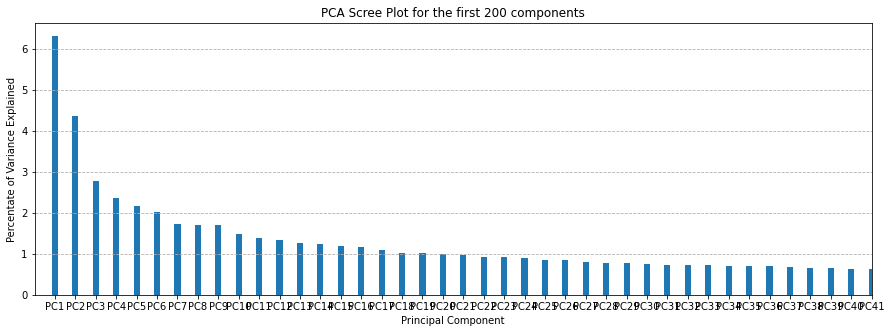

In [138]:
n_com = 200
columns = ["PC%d"%(i+1) for i in range(0,n_com)] 
plt.figure(figsize=(15, 5))
plt.bar(x= range(0,n_com), height=percent_variance[0:n_com], tick_label=columns,  width=0.3)
print("Cummulative variance explained of the first 200 components:","\n",np.cumsum(percent_variance[0:200]))
plt.grid(linestyle="--",axis="y")
plt.ylabel('Percentate of Variance Explained')
plt.xlim(-1,40)
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot for the first 200 components');

Cummulative variance explained of the first 200 components: 
 [ 6.31 10.67 13.45 15.8  17.97 19.99 21.72 23.42 25.11 26.59 27.98 29.32
 30.58 31.82 33.   34.17 35.27 36.3  37.32 38.31 39.28 40.2  41.11 42.01
 42.85 43.69 44.5  45.28 46.05 46.79 47.52 48.25 48.97 49.68 50.38 51.07
 51.74 52.4  53.05 53.69 54.32 54.93 55.54 56.13 56.72 57.3  57.86 58.41
 58.96 59.5  60.03 60.56 61.08 61.59 62.08 62.57 63.06 63.53 64.   64.46
 64.92 65.37 65.81 66.24 66.67 67.1  67.52 67.93 68.34 68.74 69.14 69.54
 69.93 70.31 70.69 71.06 71.43 71.8  72.16 72.52 72.87 73.22 73.56 73.89
 74.22 74.55 74.87 75.19 75.51 75.83 76.14 76.45 76.76 77.06 77.36 77.66
 77.95 78.24 78.52 78.8  79.07 79.34 79.61 79.88 80.15 80.41 80.67 80.92
 81.17 81.42 81.66 81.9  82.14 82.38 82.61 82.84 83.07 83.3  83.52 83.74
 83.96 84.18 84.39 84.6  84.81 85.02 85.23 85.43 85.63 85.83 86.03 86.22
 86.41 86.6  86.79 86.97 87.15 87.33 87.51 87.69 87.86 88.03 88.2  88.37
 88.53 88.69 88.85 89.01 89.16 89.31 89.46 89.61 89.76 89.91]


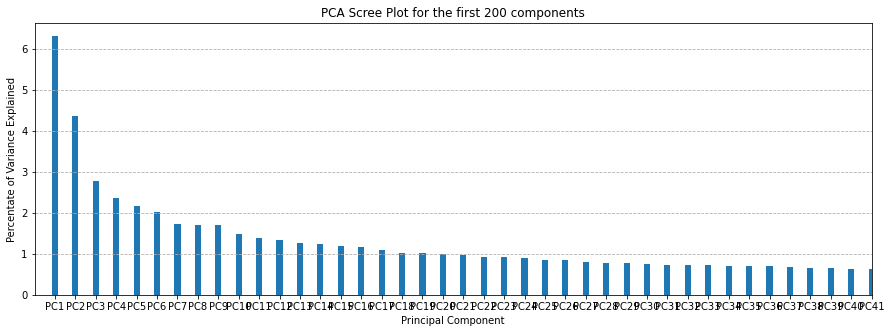

In [139]:
n_com = 154
columns = ["PC%d"%(i+1) for i in range(0,n_com)] 
plt.figure(figsize=(15, 5))
plt.bar(x= range(0,n_com), height=percent_variance[0:n_com], tick_label=columns,  width=0.3)
print("Cummulative variance explained of the first 200 components:","\n",np.cumsum(percent_variance[0:154]))
plt.grid(linestyle="--",axis="y")
plt.ylabel('Percentate of Variance Explained')
plt.xlim(-1,40)
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot for the first 200 components');

We need around 154 components to retain 90% of the variance.

In [140]:
pca_new=decomposition.PCA(n_components=154)
pca_new.fit(X_normalized_B)
X_reduced_B=pca_new.transform(X_normalized_B)

### Split datasets

In this case we are going to distribute the data in this way: training set(60%), validation set (20%), test set (20%)

In [141]:
X_trainB, X_testB, X_validB = np.split(X_reduced_B, [int(.6*len(X_reduced_B)), int(.8*len(X_reduced_B))])
y_trainB, y_testB, y_validB = np.split(Y_B, [int(.6*len(Y_B)), int(.8*len(Y_B))])

We check the shapes of each dataset:

In [142]:
X_trainB.shape

(110386, 154)

In [143]:
X_testB.shape

(36796, 154)

In [144]:
X_validB.shape

(36796, 154)

## Deep learning models

We saw that deep learning models made better classifiers, hence, we are going to work with these ones.

### Dense neural network

We will start by using the same dense neural network and compare adam and nadam optimizers

In [145]:
model1B = Sequential()
model1B.add(Dense(32, activation='relu', input_dim=X_trainB.shape[1]))
model1B.add(Dropout(rate=0.25))
model1B.add(Dense(1, activation = 'sigmoid'))

**Adam**

In [146]:
model1B.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [147]:
model1B.fit(X_trainB, y_trainB.ravel(), batch_size=32, epochs=25, verbose=1)

Epoch 1/25
3450/3450 [==============================] - 3s 871us/step - loss: 0.2911 - accuracy: 0.9117
Epoch 2/25
3450/3450 [==============================] - 3s 865us/step - loss: 0.2288 - accuracy: 0.9226
Epoch 3/25
3450/3450 [==============================] - 3s 891us/step - loss: 0.2020 - accuracy: 0.9367
Epoch 4/25
3450/3450 [==============================] - 3s 867us/step - loss: 0.1883 - accuracy: 0.9426
Epoch 5/25
3450/3450 [==============================] - 3s 864us/step - loss: 0.1811 - accuracy: 0.9450
Epoch 6/25
3450/3450 [==============================] - 3s 869us/step - loss: 0.1751 - accuracy: 0.9466
Epoch 7/25
3450/3450 [==============================] - 3s 872us/step - loss: 0.1696 - accuracy: 0.9481
Epoch 8/25
3450/3450 [==============================] - 3s 866us/step - loss: 0.1659 - accuracy: 0.9491
Epoch 9/25
3450/3450 [==============================] - 3s 884us/step - loss: 0.1605 - accuracy: 0.9501
Epoch 10/25
3450/3450 [==============================] - 3s 871u

In [148]:
y_validB_preds_dense1=model1B.predict(X_validB, verbose=1)

1150/1150 [==============================] - 1s 624us/step


In [149]:
print('Validation data for Dense Neural Network with Adam optimizer:')
print_report(y_validB,y_validB_preds_dense1, thresh);

Validation data for Dense Neural Network with Adam optimizer:
accuracy:0.885
recall:0.526
precision:0.639
specificity:0.948
prevalence:0.149
 


**Nadam**

In [150]:
model2B = Sequential()
model2B.add(Dense(32, activation='relu', input_dim=X_trainB.shape[1]))
model2B.add(Dropout(rate=0.25))
model2B.add(Dense(1, activation = 'sigmoid'))

In [151]:
model2B.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [152]:
model2B.fit(X_trainB, y_trainB.ravel(), batch_size=32, epochs=25, verbose=1)

Epoch 1/25
3450/3450 [==============================] - 4s 966us/step - loss: 0.2895 - accuracy: 0.9119
Epoch 2/25
3450/3450 [==============================] - 3s 924us/step - loss: 0.2221 - accuracy: 0.9257
Epoch 3/25
3450/3450 [==============================] - 3s 925us/step - loss: 0.1926 - accuracy: 0.9399
Epoch 4/25
3450/3450 [==============================] - 4s 1ms/step - loss: 0.1793 - accuracy: 0.9457
Epoch 5/25
3450/3450 [==============================] - 3s 948us/step - loss: 0.1703 - accuracy: 0.9484
Epoch 6/25
3450/3450 [==============================] - 3s 941us/step - loss: 0.1638 - accuracy: 0.9498
Epoch 7/25
3450/3450 [==============================] - 3s 940us/step - loss: 0.1584 - accuracy: 0.9512
Epoch 8/25
3450/3450 [==============================] - 3s 943us/step - loss: 0.1541 - accuracy: 0.9527
Epoch 9/25
3450/3450 [==============================] - 3s 972us/step - loss: 0.1501 - accuracy: 0.9537
Epoch 10/25
3450/3450 [==============================] - 3s 950us/

In [153]:
y_validB_preds_dense2=model2B.predict(X_validB, verbose=1)

1150/1150 [==============================] - 1s 901us/step


In [154]:
print('Validation data for Dense Neural Network with Nadam optimizer:')
print_report(y_validB,y_validB_preds_dense2, thresh);

Validation data for Dense Neural Network with Nadam optimizer:
accuracy:0.887
recall:0.540
precision:0.646
specificity:0.948
prevalence:0.149
 


**Adamax**

In [155]:
model3B = Sequential()
model3B.add(Dense(32, activation='relu', input_dim=X_trainB.shape[1]))
model3B.add(Dropout(rate=0.25))
model3B.add(Dense(1, activation = 'sigmoid'))

In [156]:
model3B.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [157]:
model3B.fit(X_trainB, y_trainB.ravel(), batch_size=32, epochs=25, verbose=1)

Epoch 1/25
3450/3450 [==============================] - 4s 1ms/step - loss: 0.3190 - accuracy: 0.9114
Epoch 2/25
3450/3450 [==============================] - 4s 1ms/step - loss: 0.2916 - accuracy: 0.9116
Epoch 3/25
3450/3450 [==============================] - 3s 979us/step - loss: 0.2795 - accuracy: 0.9116
Epoch 4/25
3450/3450 [==============================] - 3s 985us/step - loss: 0.2644 - accuracy: 0.9122
Epoch 5/25
3450/3450 [==============================] - 4s 1ms/step - loss: 0.2483 - accuracy: 0.9158
Epoch 6/25
3450/3450 [==============================] - 4s 1ms/step - loss: 0.2337 - accuracy: 0.9206
Epoch 7/25
3450/3450 [==============================] - 3s 964us/step - loss: 0.2211 - accuracy: 0.9268
Epoch 8/25
3450/3450 [==============================] - 3s 1ms/step - loss: 0.2117 - accuracy: 0.9312
Epoch 9/25
3450/3450 [==============================] - 4s 1ms/step - loss: 0.2037 - accuracy: 0.9355
Epoch 10/25
3450/3450 [==============================] - 4s 1ms/step - loss:

In [158]:
y_validB_preds_dense3=model3B.predict(X_validB, verbose=1)

1150/1150 [==============================] - 1s 621us/step


In [159]:
print('Validation data for Dense Neural Network with Adamax optimizer:')
print_report(y_validB,y_validB_preds_dense3, thresh);

Validation data for Dense Neural Network with Adamax optimizer:
accuracy:0.856
recall:0.432
precision:0.524
specificity:0.931
prevalence:0.149
 


1150/1150 [==============================] - 1s 640us/step


<Figure size 288x288 with 0 Axes>

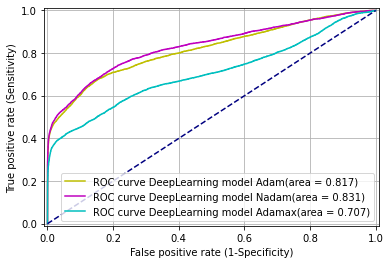

In [160]:
p1B=model1B.predict(X_validB, verbose=1)
tpr1B=roc_curve(y_validB.ravel(),p1B)[0] # True Positive rate
fpr1B=roc_curve(y_validB.ravel(),p1B)[1] # False Positive rate
AUC1B=auc(tpr1B,fpr1B) # Area under Curve

p2B=model2B.predict(X_validB, verbose=1)
tpr2B=roc_curve(y_validB.ravel(),p2B)[0] # True Positive rate
fpr2B=roc_curve(y_validB.ravel(),p2B)[1] # False Positive rate
AUC2B=auc(tpr2B,fpr2B) # Area under Curve


p3B=model3B.predict(X_validB, verbose=1)
tpr3B=roc_curve(y_validB.ravel(),p3B)[0] # True Positive rate
fpr3B=roc_curve(y_validB.ravel(),p3B)[1] # False Positive rate
AUC3B=auc(tpr3B,fpr3B) # Area under Curve





plt.figure(figsize=(4,4))
plt.figure(2)
plt.plot(tpr1B, fpr1B, color='y',label='ROC curve DeepLearning model Adam(area = %0.3f)' % AUC1B)
plt.plot(tpr2B, fpr2B, color='m',label='ROC curve DeepLearning model Nadam(area = %0.3f)' % AUC2B)
plt.plot(tpr3B, fpr3B, color='c',label='ROC curve DeepLearning model Adamax(area = %0.3f)' % AUC3B)


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
#plt.xticks(np.arange(0,1.1,.1))
#plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid();
plt.show()

In this case, Adam optimizer works better than Nadam and Adamax. So, let's try to improve our dense neural network with Adam.

Let's try to build a better CNN combining dense NN:

In [161]:
X_train_CNNB = np.reshape(X_trainB, (X_trainB.shape[0], X_trainB.shape[1], 1))
X_valid_CNNB = np.reshape(X_validB, (X_validB.shape[0], X_validB.shape[1], 1))
X_test_CNNB = np.reshape(X_testB, (X_testB.shape[0], X_testB.shape[1], 1))

print(X_train_CNNB.shape)
print(X_valid_CNNB.shape)
print(X_test_CNNB.shape)
print(y_trainB.shape[1])

(110386, 154, 1)
(36796, 154, 1)
(36796, 154, 1)
1


In [162]:
model8B = Sequential()

model8B.add(Conv1D(filters=140, kernel_size=5, activation='relu', input_shape=(154,1)))
         
model8B.add(Dropout(rate=0.25))

model8B.add(Flatten())

model8B.add(Dense(1,activation='sigmoid'))

In [163]:
model8B.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [164]:
model8B.fit(X_train_CNNB, y_trainB, batch_size=32, epochs=18, verbose=1)

Epoch 1/18
3450/3450 [==============================] - 27s 8ms/step - loss: 0.2744 - accuracy: 0.9125
Epoch 2/18
3450/3450 [==============================] - 26s 7ms/step - loss: 0.2024 - accuracy: 0.9297
Epoch 3/18
3450/3450 [==============================] - 26s 7ms/step - loss: 0.1672 - accuracy: 0.9440
Epoch 4/18
3450/3450 [==============================] - 26s 7ms/step - loss: 0.1522 - accuracy: 0.9491
Epoch 5/18
3450/3450 [==============================] - 26s 8ms/step - loss: 0.1447 - accuracy: 0.9511
Epoch 6/18
3450/3450 [==============================] - 26s 8ms/step - loss: 0.1401 - accuracy: 0.9524
Epoch 7/18
3450/3450 [==============================] - 27s 8ms/step - loss: 0.1366 - accuracy: 0.9536
Epoch 8/18
3450/3450 [==============================] - 27s 8ms/step - loss: 0.1348 - accuracy: 0.9544
Epoch 9/18
3450/3450 [==============================] - 27s 8ms/step - loss: 0.1326 - accuracy: 0.9548
Epoch 10/18
3450/3450 [==============================] - 27s 8ms/step - l

In [165]:
y_validB_preds_dense4=model8B.predict(X_valid_CNNB, verbose=1)

1150/1150 [==============================] - 2s 2ms/step


In [166]:
print('Validation data for Dense Neural Network with Adamax optimizer:')
print_report(y_validB,y_validB_preds_dense4, thresh);

Validation data for Dense Neural Network with Adamax optimizer:
accuracy:0.907
recall:0.578
precision:0.743
specificity:0.965
prevalence:0.149
 


1150/1150 [==============================] - 2s 2ms/step


<Figure size 288x288 with 0 Axes>

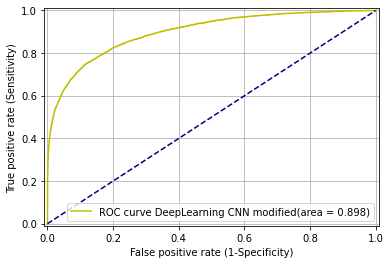

In [167]:
p8B=model8B.predict(X_valid_CNNB, verbose=1)
tpr8B=roc_curve(y_validB.ravel(),p8B)[0] # True Positive rate
fpr8B=roc_curve(y_validB.ravel(),p8B)[1] # False Positive rate
AUC8B=auc(tpr8B,fpr8B) # Area under Curve


plt.figure(figsize=(4,4))
plt.figure(2)
plt.plot(tpr8B, fpr8B, color='y',label='ROC curve DeepLearning CNN modified(area = %0.3f)' % AUC8B)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
#plt.xticks(np.arange(0,1.1,.1))
#plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid();
plt.show()

We can clearly see that for this dataset the CNN model works much better. With 18 epochs we reach an AUC of almost 0.9.

Another point worth noting is that we have obtained the highest value for the recall metric until now, 0.607, which leads us to think that with more arrhythmia samples, we achieve better results (we changed to a dataset with more arrhythmia samples).

Also, we can look at the specificity, which has a value of 0.962, which means that we have few false positives (our classifier detects almost perfectly all normal beats, due to the fact that the number of normal beats is extremely high compared to the number of abnormal beats).

In this second dataset, we have a high number of supraventricular arrhythmias, so maybe this concrete type of arrhythmia is well classified, however, there is a low number of ventricular arrhythmias as we saw in our exploratory analysis, thus, this kind of arrhythmia may not be classified properly as an abnormal beat. If we had a more balanced dataset, our model would be a better classifier.

We can try our classifier in the test data:

In [168]:
y_testB_preds_dense4=model8B.predict(X_test_CNNB, verbose=1)

1150/1150 [==============================] - 3s 2ms/step


In [169]:
print('Validation data for Dense Neural Network with Adamax optimizer:')
print_report(y_testB,y_testB_preds_dense4, thresh);

Validation data for Dense Neural Network with Adamax optimizer:
accuracy:0.847
recall:0.454
precision:0.621
specificity:0.937
prevalence:0.186
 


1150/1150 [==============================] - 2s 2ms/step


<Figure size 288x288 with 0 Axes>

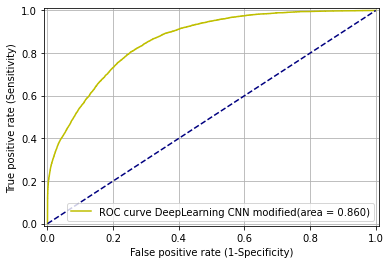

In [170]:
p8B=model8B.predict(X_test_CNNB, verbose=1)
tpr8B=roc_curve(y_testB.ravel(),p8B)[0] # True Positive rate
fpr8B=roc_curve(y_testB.ravel(),p8B)[1] # False Positive rate
AUC8B=auc(tpr8B,fpr8B) # Area under Curve


plt.figure(figsize=(4,4))
plt.figure(2)
plt.plot(tpr8B, fpr8B, color='y',label='ROC curve DeepLearning CNN modified(area = %0.3f)' % AUC8B)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
#plt.xticks(np.arange(0,1.1,.1))
#plt.yticks(np.arange(0,1.1,.1))
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.legend(loc="lower right")
plt.grid();
plt.show()

In our test data the model performs a bit worse than in our validation data. Nevertheless, it is still more accurate than the models for the first dataset, which tells us that this time we splitted in a proper way our data into training, validation and test datasets.

# Conclusion

To put the matter in a nutshell, it is seen that working with a more representative dataset increases the classifier's accuracy and performance. Furthermore, CNN is the best model with an AUC of **0.9** with **18** epochs.